In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from tqdm import tqdm
import cv2

import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [5]:
label_count = {'Human': 34999, 'Blank': 35000, 'Elephant_African': 34999, 'Hog_Red_River': 26069, 'Buffalo_African': 6459, 'Leopard_African': 2142, 'Monkey': 5038, 'Duiker_Blue': 35000, 'Duiker_Red': 34999, 'Porcupine_Brush_Tailed': 13694, 'Rodent': 1358, 'Squirrel': 11348, 'Rat_Giant': 34225, 'Guineafowl_Crested': 1513, 'Duiker_Yellow_Backed': 15436, 'Guineafowl_Black': 12054, 'Mongoose': 5518, 'Rail_Nkulengu': 3269, 'Chimpanzee': 5260, 'Bird': 6649, 'Genet': 3303, 'Gorilla': 1074, 'Pangolin': 872, 'Mongoose_Black_Footed': 1475, 'Mandrillus': 9305, 'Civet_African_Palm': 936, 'Chevrotain_Water': 4713, 'Cat_Golden': 406}

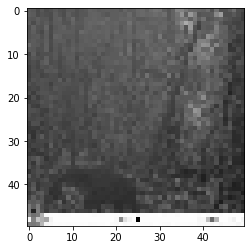

In [2]:
data = np.load("../Data/Data_Gabon/training_data_gabon.npy", allow_pickle=True)
plt.imshow(data[0][0], cmap="gray")
plt.show()

In [23]:
# use flip augmentation
for items in tqdm(data):
    if items[1] != 0 or items[1] != 1 or items[1] != 2 or items[1] != 7 or items[1] != 8 or items[1] != 12:
        # pick an image to transform
        img = image.img_to_array(items[0])  # convert image to numpy arry
        img = img.reshape((1,) + img.shape)  # reshape image

        new_image = tf.image.flip_left_right(img)
        
        augment_image = tf.reshape(new_image, test_img.shape)
        np.append(data, [augment_image, items[1]])

  0%|          | 0/347113 [00:00<?, ?it/s]C:\Users\Siebren\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
 54%|█████▍    | 187370/347113 [52:57<45:09, 58.96it/s]    


KeyboardInterrupt: 

In [26]:
data[347112]

array([array([[  8,  70,  56, ...,  81,  41,   4],
       [ 71, 136, 165, ...,  28,  58,  33],
       [ 85,  80,  42, ...,  29,  18,  29],
       ...,
       [116, 254,  96, ...,   4,  83,  68],
       [100, 112, 173, ...,   1,   8, 158],
       [  1, 182, 150, ...,  33,  16,   4]], dtype=uint8),
       8], dtype=object)

In [10]:
np.random.shuffle(data)
np.save("../Data/Data_Gabon/training_data_gabon_with_flip.npy", data)

<tf.Tensor: shape=(50, 50), dtype=float32, numpy=
array([[ 37.,  29.,  50., ...,  87.,  69., 111.],
       [ 72.,  36.,  30., ...,  62.,  44.,  78.],
       [ 30.,  32.,  64., ...,  64.,  50.,  81.],
       ...,
       [ 64.,  65.,  64., ...,  97.,  93.,  93.],
       [ 27.,  10.,   0., ..., 250.,  11.,  12.],
       [ 72.,   0.,   0., ...,   1.,   0.,  72.]], dtype=float32)>

# Example

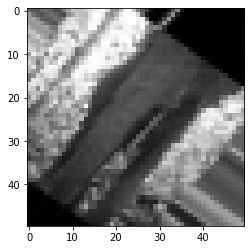

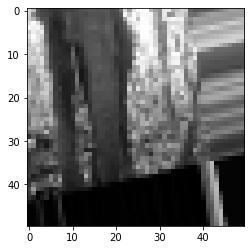

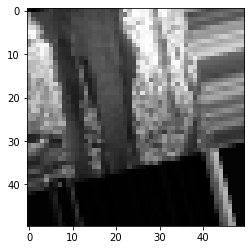

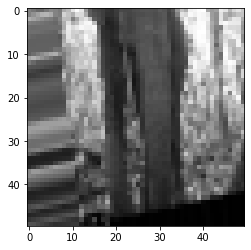

In [32]:
# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# pick an image to transform
test_img = data[2][0]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]), cmap="gray")
    i += 1
    if i >= 4:  # show 4 images
        break

plt.show()